In [1]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.5
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        q_value = self.q_values[state][action]
        max_next_q = max(self.q_values[next_state])
        td_error = reward + self.gamma * max_next_q - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error

    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action


In [3]:
from utils import gen_wrapped_env, show_video

In [4]:
# 0: RIGHT, 1: DOWN, 2: LEFT, 3: UP
# def convert_to_minigrid_actions(current_dir, target_dir):
#     delta = (target_dir - current_dir) % 4
#     if delta == 0:
#         return [2]  # move forward
#     elif delta == 1:
#         return [1, 2]  # right, forward
#     elif delta == 2:
#         return [1, 1, 2]  # 180 turn, forward
#     elif delta == 3:
#         return [0, 2]  # left, forward

env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
agent = QLearning(actions=3, agent_indicator=10)  # 상하좌우 4개 액션만 정의

rewards = []
success = 0
episodes = 100000

for ep in range(episodes):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0
episode: 520, rewards: 0
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0.82
episode: 620, rewards: 0.604
episode: 640, rewards: 0.6759999999999999
episode: 660, rewards: 0
episode: 680, rewards: 0.15400000000000003
episode: 700, rewards: 0.6399999999999999
episode: 720, rewards: 0
episode: 740, rewards: 0
episode: 760, reward

In [5]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [6e-05, 6e-05, 0.00012],
 12: [0.0004, 0.0004, 0.00093],
 15: [0.00322, 0.00319, 0.00583],
 3: [0.00012, 0.00012, 0.0002],
 6: [0.00027, 0.00027, 0.00048],
 24: [0.00115, 0.00117, 0.00266],
 18: [0.00712, 0.00718, 0.01402],
 27: [0.01684, 0.01677, 0.03056],
 9: [0.00053, 0.00053, 0.00107],
 39: [0.06204, 0.06233, 0.13477],
 42: [0.20045, 0.20054, 0.40248],
 21: [0.01263, 0.01238, 0.01913],
 36: [0.00273, 0.00271, 0.00489],
 30: [0.04326, 0.04318, 0.07995],
 33: [0.08336, 0.08325, 0.13595],
 45: [0.0, 0.0, 0.0]}

In [6]:
show_video()

In [11]:
import os
os.makedirs("./logs", exist_ok=True)

pd.Series(rewards).to_csv('./logs/rewards_q_gamma05.csv')


In [13]:
#sarsa_logs = pd.read_csv('./logs/rewards_sarsa.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_q_gamma05.csv', index_col=False).iloc[:, 1]

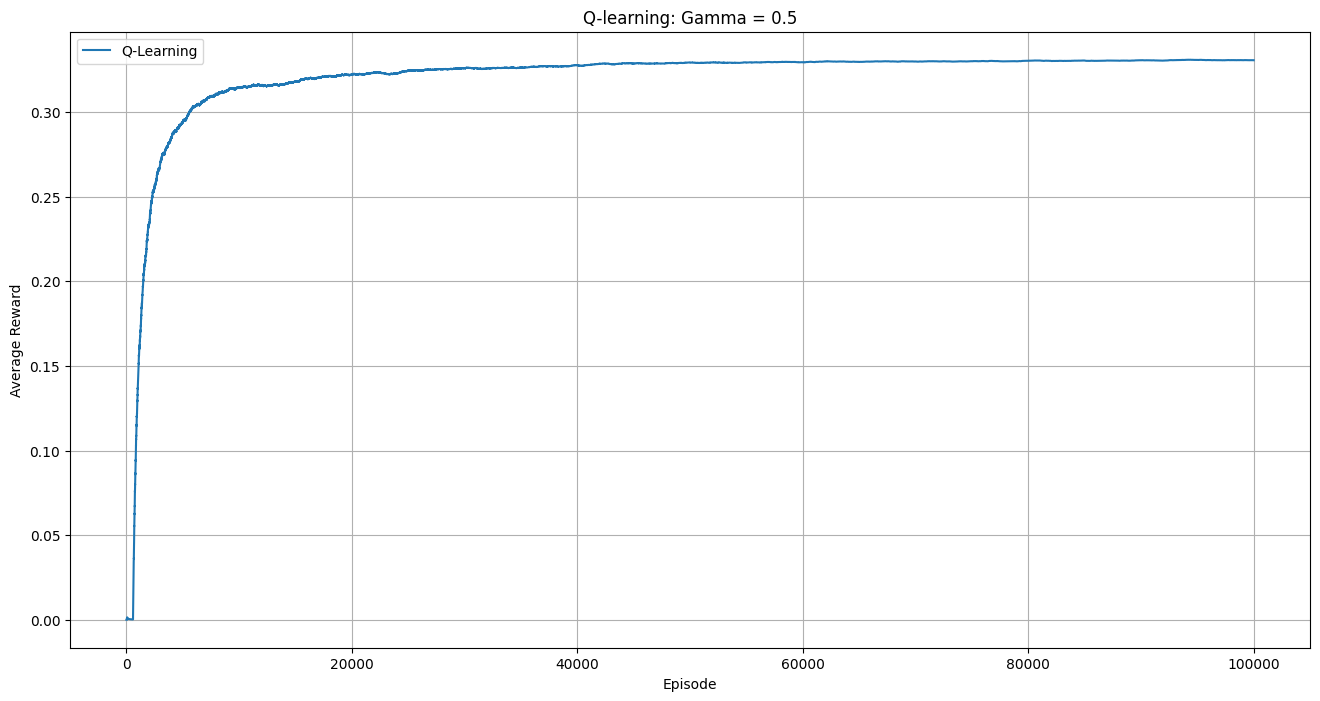

In [15]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0])) + 1), label="Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Q-learning: Gamma = 0.5")
plt.legend()
plt.grid(True)
plt.savefig("q_gamma05.jpg", dpi=300, bbox_inches='tight')
plt.show()
